In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from cv2 import imread
import os
import matplotlib.pyplot as plt

In [3]:
train_path = '/kaggle/input/face-expression-recognition-dataset/images/train'
test_path = '/kaggle/input/face-expression-recognition-dataset/images/validation'

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    color_mode='grayscale',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

test_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    color_mode='grayscale',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

Found 28821 files belonging to 7 classes.
Found 28821 files belonging to 7 classes.


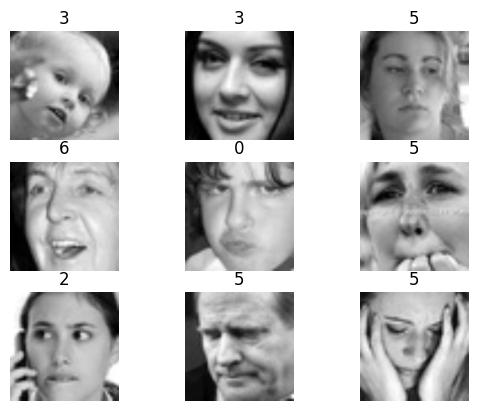

In [5]:
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(str(int(labels[i])))
        plt.axis("off")

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Rescaling

In [7]:
classes = train_data.class_names

In [8]:
n_outputs = len(classes)

In [17]:
model = Sequential([
    Rescaling(1./255, input_shape=(224, 224, 1)),
    Conv2D(16, (4, 4), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(8, (2, 2), activation='relu'),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_outputs, activation='softmax')
])

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)

In [20]:
hist = model.fit(
    train_data,
    epochs=20,
    shuffle=True,
    verbose=2
)

Epoch 1/20
901/901 - 17s - loss: 1.6772 - 17s/epoch - 18ms/step
Epoch 2/20
901/901 - 16s - loss: 1.5330 - 16s/epoch - 17ms/step
Epoch 3/20
901/901 - 15s - loss: 1.4032 - 15s/epoch - 17ms/step
Epoch 4/20
901/901 - 15s - loss: 1.2743 - 15s/epoch - 17ms/step
Epoch 5/20
901/901 - 24s - loss: 1.1444 - 24s/epoch - 26ms/step
Epoch 6/20
901/901 - 15s - loss: 1.0011 - 15s/epoch - 17ms/step
Epoch 7/20
901/901 - 15s - loss: 0.8363 - 15s/epoch - 16ms/step
Epoch 8/20
901/901 - 14s - loss: 0.6738 - 14s/epoch - 16ms/step
Epoch 9/20
901/901 - 15s - loss: 0.5347 - 15s/epoch - 16ms/step
Epoch 10/20
901/901 - 16s - loss: 0.4142 - 16s/epoch - 18ms/step
Epoch 11/20
901/901 - 14s - loss: 0.3124 - 14s/epoch - 16ms/step
Epoch 12/20
901/901 - 15s - loss: 0.2530 - 15s/epoch - 16ms/step
Epoch 13/20
901/901 - 15s - loss: 0.2154 - 15s/epoch - 16ms/step
Epoch 14/20
901/901 - 16s - loss: 0.1915 - 16s/epoch - 17ms/step
Epoch 15/20
901/901 - 14s - loss: 0.1576 - 14s/epoch - 16ms/step
Epoch 16/20
901/901 - 15s - loss: 

In [22]:
model.evaluate(test_data)

901/901 [==============================] - 14s 15ms/step - loss: 0.3883


0.38825204968452454

In [23]:
y_pred = model.predict(test_data)

901/901 [==============================] - 14s 15ms/step


In [25]:
np.argmax(y_pred[0])

3